In [1]:
import os

import torch
import torch.nn as nn

import pandas as pd
import numpy as np
import json

from tqdm import tqdm
from datetime import datetime
import time
import matplotlib.pyplot as plt

In [2]:
import drbc
import utils
import utils.data
import utils.eval
import utils.baseline

In [3]:
import networkit as nk
import networkx as nx

In [4]:
class Setting:
    _root = os.getcwd()

    _data = os.path.join(_root, "hw1_data")

    data_synthetic = os.path.join(_data, "Synthetic", "5000")
    
    data_youtube = os.path.join(_data, "Real", "youtube")
    data_amazon = os.path.join(_data, "Real", "amazon")
    data_dblp = os.path.join(_data, "Real", "dblp")
    data_comlj = os.path.join(_data, "Real", "com-lj")
    
    data_train = os.path.join(_data, "train")
    data_valid = os.path.join(_data, "valid")
    
    ### Data split
    data_split = os.path.join(_root, "split.json")
    

    # Setting of training
    device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

    epochs = 500
    nodes_cnt = 200
    
    params_drbc = dict(
        # according to source paper
        encoder_params = dict(
            c = 3,
            p = 128,
            num_layers = 5,
            device = device
        ),
        decoder_params = dict(
            p = 128,
            q = 64
        )
    )

    
    def __init__(self, date_time=None):
        
    
        # Create dir for train/test
        self.root = os.path.join(self._root, "result", date_time)
        if os.path.exists(self.root):
            pass
        else:
            os.makedirs(self.root)


        ### Save plt info
        self.train_info_p = os.path.join(self.root, "train.json")
        self.val_info_p = os.path.join(self.root, "valid.json")

        ### Save plt img
        self.result_plt_p = os.path.join(self.root, "train_plt.png")
    
        self.weight_drbc = os.path.join(self.root, "drbc.pth")
    

In [5]:
date_time = datetime.strftime(datetime.now(), "%Y-%m-%d %H-%M")

In [6]:
setting = Setting(date_time="baseline")
setting.root

'/home/ai2019/ne6081064/june/mlg/snrs_hw1/result/baseline'

In [7]:
syn, syn_score = utils.data.load_data(Setting.data_synthetic, mode="between")
yt, yt_score = utils.data.load_data(Setting.data_youtube, mode="between")
amazon, amazon_score = utils.data.load_data(Setting.data_amazon, mode="between")
dblp, dblp_score = utils.data.load_data(Setting.data_dblp, mode="between")
comlj, comlj_score = utils.data.load_data(Setting.data_comlj, mode="between")

# Synthetic

## Kadabra

In [10]:
top1_list, top5_list, top10_list, kendal_list, time_list = utils.baseline.run_kadabra(syn, syn_score, x_sep="\t", y_sep=None, usecols=1)


top1_list = np.array(top1_list)
top5_list = np.array(top5_list)
top10_list = np.array(top10_list)
kendal_list = np.array(kendal_list)
time_list = np.array(time_list)


print("Top1: mean={:.2f}, std={:.2f}".format(np.mean(top1_list), np.std(top1_list)))
print("Top5: mean={:.2f}, std={:.2f}".format(np.mean(top5_list), np.std(top5_list)))
print("Top10: mean={:.2f}, std={:.2f}".format(np.mean(top10_list), np.std(top10_list)))
print("Kendal: mean={:.2f}, std={:.2f}".format(np.mean(kendal_list), np.std(kendal_list)))
print("Time: mean={:.2f}, std={:.2f}".format(np.mean(time_list), np.std(time_list)))


with open(os.path.join(setting.root, "kadabra.json"), 'w') as f:
    json.dump({
        "top1": list(top1_list),
        "top5": list(top5_list),
        "top10": list(top10_list),
        "kendal": list(kendal_list),
        "time": list(time_list)
    }, f)

Top1: mean=0.26, std=0.08
Top5: mean=0.23, std=0.03
Top10: mean=0.28, std=0.02
Kendal: mean=0.21, std=0.01
Time: mean=0.04, std=0.00


## RK(KPATH)

In [14]:
top1_list, top5_list, top10_list, kendal_list, time_list = utils.baseline.run_rk(syn, syn_score, x_sep="\t", y_sep=None, usecols=1)


top1_list = np.array(top1_list)
top5_list = np.array(top5_list)
top10_list = np.array(top10_list)
kendal_list = np.array(kendal_list)
time_list = np.array(time_list)


print("Top1: mean={:.2f}, std={:.2f}".format(np.mean(top1_list), np.std(top1_list)))
print("Top5: mean={:.2f}, std={:.2f}".format(np.mean(top5_list), np.std(top5_list)))
print("Top10: mean={:.2f}, std={:.2f}".format(np.mean(top10_list), np.std(top10_list)))
print("Kendal: mean={:.2f}, std={:.2f}".format(np.mean(kendal_list), np.std(kendal_list)))
print("Time: mean={:.2f}, std={:.2f}".format(np.mean(time_list), np.std(time_list)))


with open(os.path.join(setting.root, "rk.json"), 'w') as f:
    json.dump({
        "top1": list(top1_list),
        "top5": list(top5_list),
        "top10": list(top10_list),
        "kendal": list(kendal_list),
        "time": list(time_list)
    }, f)

Top1: mean=0.25, std=0.08
Top5: mean=0.20, std=0.03
Top10: mean=0.21, std=0.03
Kendal: mean=0.17, std=0.01
Time: mean=0.04, std=0.01


## KBC

In [15]:
top1_list, top5_list, top10_list, kendal_list, time_list = utils.baseline.run_kbc(syn, syn_score, x_sep="\t", y_sep=None, usecols=1)


top1_list = np.array(top1_list)
top5_list = np.array(top5_list)
top10_list = np.array(top10_list)
kendal_list = np.array(kendal_list)
time_list = np.array(time_list)


print("Top1: mean={:.2f}, std={:.2f}".format(np.mean(top1_list), np.std(top1_list)))
print("Top5: mean={:.2f}, std={:.2f}".format(np.mean(top5_list), np.std(top5_list)))
print("Top10: mean={:.2f}, std={:.2f}".format(np.mean(top10_list), np.std(top10_list)))
print("Kendal: mean={:.2f}, std={:.2f}".format(np.mean(kendal_list), np.std(kendal_list)))
print("Time: mean={:.2f}, std={:.2f}".format(np.mean(time_list), np.std(time_list)))


with open(os.path.join(setting.root, "kbc.json"), 'w') as f:
    json.dump({
        "top1": list(top1_list),
        "top5": list(top5_list),
        "top10": list(top10_list),
        "kendal": list(kendal_list),
        "time": list(time_list)
    }, f)

Top1: mean=0.26, std=0.07
Top5: mean=0.23, std=0.02
Top10: mean=0.27, std=0.02
Kendal: mean=0.10, std=0.01
Time: mean=6.51, std=0.17


## DrBC

In [13]:
import drbc

In [14]:
syn_loader = utils.data.to_dataloader(syn, syn_score, batch=1, usecols=1)

In [20]:
yt_loader = utils.data.to_dataloader(yt, yt_score, batch=1, y_sep=":", usecols=1)

In [22]:
amazon_loader = utils.data.to_dataloader(amazon, amazon_score, batch=1, y_sep=":", usecols=1)

In [15]:
model, optimizer = drbc.load_checkpoint(
                    setting.weight_drbc,
                    Setting.device,
                    drbc = Setting.params_drbc)

model

pretrained finded


DrBC(
  (encoder): Encoder(
    (w_0): Linear(in_features=3, out_features=128, bias=True)
    (relu): ReLU(inplace=True)
    (rnn): GRUCell(128, 128)
  )
  (decoder): Decoder(
    (w_4): Linear(in_features=128, out_features=64, bias=True)
    (w_5): Linear(in_features=64, out_features=1, bias=True)
    (relu): ReLU(inplace=True)
  )
)

In [16]:
top1_list, top5_list, top10_list, kendal_list, time_list, loss_list = utils.eval.eval_model(model, syn_loader, "cpu")

top1_list = np.array(top1_list)
top5_list = np.array(top5_list)
top10_list = np.array(top10_list)
kendal_list = np.array(kendal_list)
time_list = np.array(time_list)

print("Top1: mean={:.2f}, std={:.2f}".format(np.mean(top1_list), np.std(top1_list)))
print("Top5: mean={:.2f}, std={:.2f}".format(np.mean(top5_list), np.std(top5_list)))
print("Top10: mean={:.2f}, std={:.2f}".format(np.mean(top10_list), np.std(top10_list)))
print("Kendal: mean={:.2f}, std={:.2f}".format(np.mean(kendal_list), np.std(kendal_list)))
print("Time: mean={:.2f}, std={:.2f}".format(np.mean(time_list), np.std(time_list)))

with open(os.path.join(setting.root, "drbc.json".format(setting.nodes_cnt)), 'w') as f:
    json.dump({
        "top1": list(top1_list),
        "top5": list(top5_list),
        "top10": list(top10_list),
        "kendal": list(kendal_list),
        "time": list(time_list)
    }, f)

100%|██████████| 30/30 [00:11<00:00,  2.57it/s]

Top1: mean=0.97, std=0.02
Top5: mean=0.96, std=0.01
Top10: mean=0.96, std=0.01
Kendal: mean=0.81, std=0.01
Time: mean=0.38, std=0.02


# Youtube

## Kadabra

In [9]:
top1_list, top5_list, top10_list, kendal_list, time_list = utils.baseline.run_kadabra(yt, yt_score, x_sep=None, y_sep=None, usecols=1)


top1_list = np.array(top1_list)
top5_list = np.array(top5_list)
top10_list = np.array(top10_list)
kendal_list = np.array(kendal_list)
time_list = np.array(time_list)


print("Top1: mean={:.2f}, std={:.2f}".format(np.mean(top1_list), np.std(top1_list)))
print("Top5: mean={:.2f}, std={:.2f}".format(np.mean(top5_list), np.std(top5_list)))
print("Top10: mean={:.2f}, std={:.2f}".format(np.mean(top10_list), np.std(top10_list)))
print("Kendal: mean={:.2f}, std={:.2f}".format(np.mean(kendal_list), np.std(kendal_list)))
print("Time: mean={:.2f}, std={:.2f}".format(np.mean(time_list), np.std(time_list)))


# with open(os.path.join(setting.root, "kadabra.json"), 'w') as f:
#     json.dump({
#         "top1": list(top1_list),
#         "top5": list(top5_list),
#         "top10": list(top10_list),
#         "kendal": list(kendal_list),
#         "time": list(time_list)
#     }, f)

Top1: mean=0.11, std=0.00
Top5: mean=0.06, std=0.00
Top10: mean=0.07, std=0.00
Kendal: mean=0.06, std=0.00
Time: mean=1.20, std=0.00


## RK

In [11]:
top1_list, top5_list, top10_list, kendal_list, time_list = utils.baseline.run_rk(yt, yt_score, x_sep=None, y_sep=None, usecols=1)


top1_list = np.array(top1_list)
top5_list = np.array(top5_list)
top10_list = np.array(top10_list)
kendal_list = np.array(kendal_list)
time_list = np.array(time_list)


print("Top1: mean={:.2f}, std={:.2f}".format(np.mean(top1_list), np.std(top1_list)))
print("Top5: mean={:.2f}, std={:.2f}".format(np.mean(top5_list), np.std(top5_list)))
print("Top10: mean={:.2f}, std={:.2f}".format(np.mean(top10_list), np.std(top10_list)))
print("Kendal: mean={:.2f}, std={:.2f}".format(np.mean(kendal_list), np.std(kendal_list)))
print("Time: mean={:.2f}, std={:.2f}".format(np.mean(time_list), np.std(time_list)))


# with open(os.path.join(setting.root, "kadabra.json"), 'w') as f:
#     json.dump({
#         "top1": list(top1_list),
#         "top5": list(top5_list),
#         "top10": list(top10_list),
#         "kendal": list(kendal_list),
#         "time": list(time_list)
#     }, f)

Top1: mean=0.16, std=0.00
Top5: mean=0.02, std=0.00
Top10: mean=0.05, std=0.00
Kendal: mean=0.03, std=0.00
Time: mean=16.69, std=0.00


## DrBC

In [21]:
top1_list, top5_list, top10_list, kendal_list, time_list, loss_list = utils.eval.eval_model(model, yt_loader, "cpu")

top1_list = np.array(top1_list)
top5_list = np.array(top5_list)
top10_list = np.array(top10_list)
kendal_list = np.array(kendal_list)
time_list = np.array(time_list)
loss_list = np.array(loss_list)


print("Top1: mean={:.2f}, std={:.2f}".format(np.mean(top1_list), np.std(top1_list)))
print("Top5: mean={:.2f}, std={:.2f}".format(np.mean(top5_list), np.std(top5_list)))
print("Top10: mean={:.2f}, std={:.2f}".format(np.mean(top10_list), np.std(top10_list)))
print("Kendal: mean={:.2f}, std={:.2f}".format(np.mean(kendal_list), np.std(kendal_list)))
print("Time: mean={:.2f}, std={:.2f}".format(np.mean(time_list), np.std(time_list)))
print("Loss: mean={:.2f}, std={:.2f}".format(np.mean(loss_list), np.std(loss_list)))

100%|██████████| 1/1 [01:34<00:00, 94.94s/it]

Top1: mean=0.66, std=0.00
Top5: mean=0.21, std=0.00
Top10: mean=0.11, std=0.00
Kendal: mean=-0.51, std=0.00
Time: mean=94.23, std=0.00
Loss: mean=0.69, std=0.00


## Amazon

### Kadabra

In [23]:
top1_list, top5_list, top10_list, kendal_list, time_list = utils.baseline.run_kadabra(amazon, amazon_score, x_sep=None, y_sep=None, usecols=1)


top1_list = np.array(top1_list)
top5_list = np.array(top5_list)
top10_list = np.array(top10_list)
kendal_list = np.array(kendal_list)
time_list = np.array(time_list)


print("Top1: mean={:.2f}, std={:.2f}".format(np.mean(top1_list), np.std(top1_list)))
print("Top5: mean={:.2f}, std={:.2f}".format(np.mean(top5_list), np.std(top5_list)))
print("Top10: mean={:.2f}, std={:.2f}".format(np.mean(top10_list), np.std(top10_list)))
print("Kendal: mean={:.2f}, std={:.2f}".format(np.mean(kendal_list), np.std(kendal_list)))
print("Time: mean={:.2f}, std={:.2f}".format(np.mean(time_list), np.std(time_list)))


# with open(os.path.join(setting.root, "kadabra.json"), 'w') as f:
#     json.dump({
#         "top1": list(top1_list),
#         "top5": list(top5_list),
#         "top10": list(top10_list),
#         "kendal": list(kendal_list),
#         "time": list(time_list)
#     }, f)

Top1: mean=0.13, std=0.00
Top5: mean=0.09, std=0.00
Top10: mean=0.07, std=0.00
Kendal: mean=0.10, std=0.00
Time: mean=7.04, std=0.00


### RK(KPATH)

In [24]:
top1_list, top5_list, top10_list, kendal_list, time_list = utils.baseline.run_rk(amazon, amazon_score, x_sep=None, y_sep=None, usecols=1)


top1_list = np.array(top1_list)
top5_list = np.array(top5_list)
top10_list = np.array(top10_list)
kendal_list = np.array(kendal_list)
time_list = np.array(time_list)


print("Top1: mean={:.2f}, std={:.2f}".format(np.mean(top1_list), np.std(top1_list)))
print("Top5: mean={:.2f}, std={:.2f}".format(np.mean(top5_list), np.std(top5_list)))
print("Top10: mean={:.2f}, std={:.2f}".format(np.mean(top10_list), np.std(top10_list)))
print("Kendal: mean={:.2f}, std={:.2f}".format(np.mean(kendal_list), np.std(kendal_list)))
print("Time: mean={:.2f}, std={:.2f}".format(np.mean(time_list), np.std(time_list)))


# with open(os.path.join(setting.root, "kadabra.json"), 'w') as f:
#     json.dump({
#         "top1": list(top1_list),
#         "top5": list(top5_list),
#         "top10": list(top10_list),
#         "kendal": list(kendal_list),
#         "time": list(time_list)
#     }, f)

Top1: mean=0.33, std=0.00
Top5: mean=0.01, std=0.00
Top10: mean=0.01, std=0.00
Kendal: mean=0.03, std=0.00
Time: mean=46.36, std=0.00


### DrBC

In [25]:
top1_list, top5_list, top10_list, kendal_list, time_list, loss_list = utils.eval.eval_model(model, amazon_loader, "cpu")

top1_list = np.array(top1_list)
top5_list = np.array(top5_list)
top10_list = np.array(top10_list)
kendal_list = np.array(kendal_list)
time_list = np.array(time_list)
loss_list = np.array(loss_list)


print("Top1: mean={:.2f}, std={:.2f}".format(np.mean(top1_list), np.std(top1_list)))
print("Top5: mean={:.2f}, std={:.2f}".format(np.mean(top5_list), np.std(top5_list)))
print("Top10: mean={:.2f}, std={:.2f}".format(np.mean(top10_list), np.std(top10_list)))
print("Kendal: mean={:.2f}, std={:.2f}".format(np.mean(kendal_list), np.std(kendal_list)))
print("Time: mean={:.2f}, std={:.2f}".format(np.mean(time_list), np.std(time_list)))
print("Loss: mean={:.2f}, std={:.2f}".format(np.mean(loss_list), np.std(loss_list)))

100%|██████████| 1/1 [03:15<00:00, 195.62s/it]

Top1: mean=0.80, std=0.00
Top5: mean=0.33, std=0.00
Top10: mean=0.17, std=0.00
Kendal: mean=-0.44, std=0.00
Time: mean=194.12, std=0.00
Loss: mean=0.69, std=0.00


# Visualize


top1
RK: mean=0.25, std=0.08
KBC: mean=0.26, std=0.07
KADABRA: mean=0.26, std=0.08
DrBC: mean=0.9726666666666668, std=0.01671991493864594

top5
RK: mean=0.20, std=0.03
KBC: mean=0.23, std=0.02
KADABRA: mean=0.23, std=0.03
DrBC: mean=0.9622666666666666, std=0.007844035242710795

top10
RK: mean=0.21, std=0.03
KBC: mean=0.27, std=0.02
KADABRA: mean=0.28, std=0.02
DrBC: mean=0.9588666666666665, std=0.006463916941160545

kendal
RK: mean=0.17, std=0.01
KBC: mean=0.10, std=0.01
KADABRA: mean=0.21, std=0.01
DrBC: mean=0.8142925065013004, std=0.00890875230305532

time
RK: mean=0.04, std=0.01
KBC: mean=6.51, std=0.17
KADABRA: mean=0.04, std=0.00
DrBC: mean=0.3813492218653361, std=0.022865383950550256


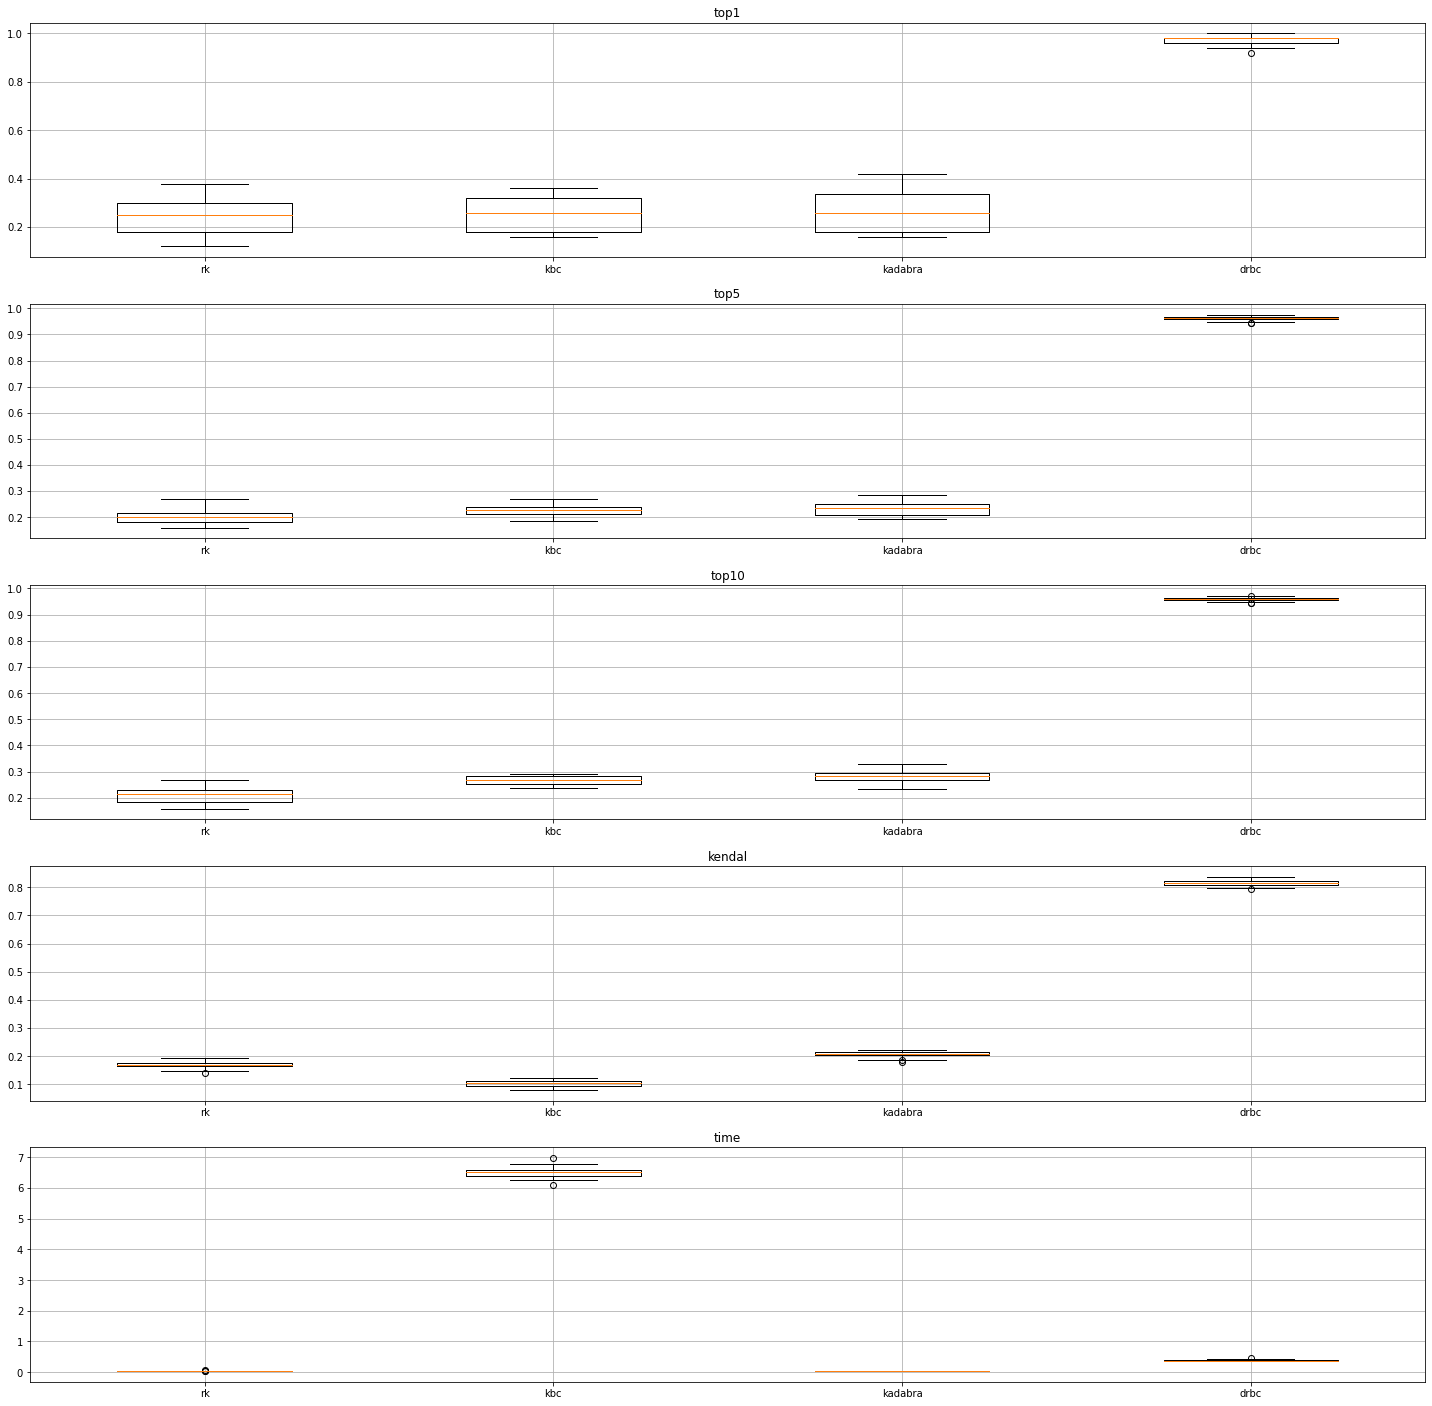

In [26]:
with open(os.path.join(setting.root, "kbc.json"), "r") as kbc_f, \
    open(os.path.join(setting.root, "kadabra.json"), "r") as kadabra_f, \
    open(os.path.join(setting.root, "rk.json"), "r") as rk_f, \
    open(os.path.join(setting.root, "drbc.json"), "r") as drbc_f:
    
    kbc = json.load(kbc_f)
    kadabra = json.load(kadabra_f)
    rk = json.load(rk_f)
    drbc = json.load(drbc_f)

    keys = list(kbc.keys())
    
    fig, axs = plt.subplots(len(keys), figsize=(25, 5*len(keys)))
    for index, ax in enumerate(axs):
        key = keys[index]
        
        ax.boxplot([rk[key], kbc[key], kadabra[key], drbc[key]], widths=0.5)
        ax.set_title(key)
        ax.grid()
        
        ### Calculate mean and std
        print("\n{}".format(key))
        rk_ = np.array(rk[key])
        print("RK: mean={:.2f}, std={:.2f}".format(np.mean(rk_), np.std(rk_)))
        
        kbc_ = np.array(kbc[key])
        print("KBC: mean={:.2f}, std={:.2f}".format(np.mean(kbc_), np.std(kbc_)))
        
        kadabra_ = np.array(kadabra[key])
        print("KADABRA: mean={:.2f}, std={:.2f}".format(np.mean(kadabra_), np.std(kadabra_)))
        
        drbc_ = np.array(drbc[key])
        print("DrBC: mean={}, std={}".format(np.mean(drbc_), np.std(drbc_)))
        
    
    plt.setp(axs,  xticklabels=['rk', 'kbc', 'kadabra', "drbc"])
    plt.savefig(os.path.join(setting.root, "synthetic_box.png"), facecolor="white")
    
    